In [1]:
import __init__path
import os
from lib.read.read_finalCpgFiles import cpgFile_DefaultExcludeAndKeep
from lib.read.read_data import load_data
from lib.read.dataset_class import dataset
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn import metrics

In [2]:
def calculate_output(classifier,test_data):
    '''
    get confusion matrix and auc score for test dataset
    '''
    pred = classifier.predict(test_data.values)
    tn, fp, fn, tp = confusion_matrix(test_data.labels,pred).ravel()
    sensitivity = tp/(fn+tp)
    specificity = tn/(fp+tn)
    prods = classifier.predict_proba(test_data.values)[:,1]
    fpr, tpr, _ = metrics.roc_curve(test_data.labels,prods)
    score = metrics.auc(fpr,tpr) #auc score
    return round(sensitivity,2), round(specificity,2), round(score,2)

def simpleRanforTest(filepath):
    exclude,keep = cpgFile_DefaultExcludeAndKeep()
    data2_unique = load_data(filepath,keep=keep,exclude=exclude)
    features_to_use_unique2 = [col for col in data2_unique.train.values.columns if col not in keep]
    print(len(data2_unique.train.values.columns),len(features_to_use_unique2))
    train_data_unqiue2 = dataset(data2_unique.train.values[features_to_use_unique2],
                        data2_unique.train.labels.astype('int8'))
    valid_data_unique2 = dataset(data2_unique.test.values[features_to_use_unique2],
                        data2_unique.test.labels.astype('int8'))
    ranfor2_unique = RandomForestClassifier().fit(train_data_unqiue2.values,train_data_unqiue2.labels)
    print(calculate_output(ranfor2_unique,valid_data_unique2))
    return train_data_unqiue2.values.columns,ranfor2_unique

# select features

In [3]:
data_dir = '/home/shuang/projects/development_eqtm/data/eqtmZscores'
withOverlapTssMethy = os.path.join(data_dir,
'withExpressionTSSMethyCpgOverlap',
'2017-12-09-eQTLsFDR-gt0_withExpressionTssMethyOverlap.txt')
withOverlapTssMethyExpressionGene = os.path.join(data_dir,
'withExpressionTSSMethyCpgOverlapGene',
'2017-12-09-eQTLsFDR-gt0_withExpressionTssMethyOverlap_withGeneOverlap.txt')
model_name='ranfor'
exclude,keep = cpgFile_DefaultExcludeAndKeep()
data1 = load_data(withOverlapTssMethy,keep=keep,exclude=exclude)
data2 = load_data(withOverlapTssMethyExpressionGene,keep=keep,exclude=exclude)
features_to_use1 = [col for col in data1.train.values.columns if col not in keep]
train_data1 = dataset(data1.train.values[features_to_use1],
                    data1.train.labels.astype('int8'))
valid_data1 = dataset(data1.test.values[features_to_use1],
                    data1.test.labels.astype('int8'))
features_to_use2 = [col for col in data2.train.values.columns if col not in keep]
train_data2 = dataset(data2.train.values[features_to_use2],
                    data2.train.labels.astype('int8'))
valid_data2 = dataset(data2.test.values[features_to_use2],
                    data2.test.labels.astype('int8'))

Raw data loaded with shape: (28454, 63)
Data Normalized.
Check the null values:
Here are columns with NaN values:
Check the loaded dataset: 
 train with shape (21340, 38)
test with shape: (7114, 38)
Raw data loaded with shape: (28454, 96)
Data Normalized.
Check the null values:
Here are columns with NaN values:
Check the loaded dataset: 
 train with shape (21340, 70)
test with shape: (7114, 70)


In [4]:
ranfor1 = RandomForestClassifier().fit(train_data1.values,train_data1.labels)
ranfor2 = RandomForestClassifier().fit(train_data2.values,train_data2.labels)


In [5]:
print(train_data1.values.shape)
print(train_data2.values.shape)
print(calculate_output(ranfor1,valid_data1))
print(calculate_output(ranfor2,valid_data2))

(21340, 37)
(21340, 69)
(0.47, 0.86, 0.78)
(0.5, 0.86, 0.79)


In [6]:
data1.train.values.columns

Index(['OverallZScore', 'expressionMean', 'expressionVar', 'TssDistance',
       'methyMean', 'methyVar', 'H4K5ac', 'H2A.Z', 'H2BK120ac', 'H3K79me2',
       'H3K27ac', 'H2BK20ac', 'H3K14ac', 'H3K9ac', 'H4K20me1', 'H3K4ac',
       'H2AK5ac', 'H3K9me3', 'H3K36me3', 'H3K4me1', 'H3K18ac', 'H3K23ac',
       'H2BK5ac', 'H3K4me3', 'H2BK12ac', 'H3K23me2', 'H4K12ac', 'DNase',
       'H2BK15ac', 'H3K9me1', 'H3K4me2', 'H3K27me3', 'H3K79me1', 'H2AK9ac',
       'H3T11ph', 'H4K8ac', 'H4K91ac', 'H3K56ac'],
      dtype='object')

In [7]:
train_data1.values.columns

Index(['expressionMean', 'expressionVar', 'TssDistance', 'methyMean',
       'methyVar', 'H4K5ac', 'H2A.Z', 'H2BK120ac', 'H3K79me2', 'H3K27ac',
       'H2BK20ac', 'H3K14ac', 'H3K9ac', 'H4K20me1', 'H3K4ac', 'H2AK5ac',
       'H3K9me3', 'H3K36me3', 'H3K4me1', 'H3K18ac', 'H3K23ac', 'H2BK5ac',
       'H3K4me3', 'H2BK12ac', 'H3K23me2', 'H4K12ac', 'DNase', 'H2BK15ac',
       'H3K9me1', 'H3K4me2', 'H3K27me3', 'H3K79me1', 'H2AK9ac', 'H3T11ph',
       'H4K8ac', 'H4K91ac', 'H3K56ac'],
      dtype='object')

In [8]:
data1_raw = pd.read_csv(withOverlapTssMethy,sep=',')
print(data1_raw.shape)
print(data1_raw.drop_duplicates(subset='SNPName').shape)
unique_data1_raw = data1_raw.drop_duplicates(subset='SNPName')
unique_data_filepath = os.path.join(data_dir,
                                     'withExpressionTSSMethyCpgOverlap',
                                     '2017-12-09-eQTLsFDR-gt0_withExpressionTssMethyOverlap_unique.txt')
unique_data1_raw.to_csv(unique_data_filepath)
data1_unique = load_data(unique_data_filepath,keep=keep,exclude=exclude)

(28454, 63)
(17460, 63)
Raw data loaded with shape: (17460, 64)
Data Normalized.
Check the null values:
Here are columns with NaN values:
Check the loaded dataset: 
 train with shape (13095, 38)
test with shape: (4365, 38)


In [9]:
features_to_use_unique1 = [col for col in data1_unique.train.values.columns if col not in keep]
train_data_unqiue1 = dataset(data1_unique.train.values[features_to_use1],
                    data1_unique.train.labels.astype('int8'))
valid_data_unique1 = dataset(data1_unique.test.values[features_to_use1],
                    data1_unique.test.labels.astype('int8'))
ranfor1_unique = RandomForestClassifier().fit(train_data_unqiue1.values,train_data_unqiue1.labels)
print(calculate_output(ranfor1_unique,valid_data_unique1))

(0.44, 0.82, 0.72)


In [10]:
data2_raw = pd.read_csv(withOverlapTssMethyExpressionGene,sep=',')
print(data2_raw.shape)
print(data2_raw.drop_duplicates(subset='SNPName').shape)
unique_data2_raw = data2_raw.drop_duplicates(subset='SNPName')
unique_data2_filepath = os.path.join(data_dir,
                                     'withExpressionTSSMethyCpgOverlapGene',
                                     '2017-12-09-eQTLsFDR-gt0_withExpressionTssMethyOverlap_withGeneOverlap_unique.txt')
unique_data2_raw.to_csv(unique_data2_filepath)
data2_unique = load_data(unique_data2_filepath,keep=keep,exclude=exclude)
features_to_use_unique2 = [col for col in data2_unique.train.values.columns if col not in keep]
train_data_unqiue2 = dataset(data2_unique.train.values[features_to_use_unique2],
                    data2_unique.train.labels.astype('int8'))
valid_data_unique2 = dataset(data2_unique.test.values[features_to_use_unique2],
                    data2_unique.test.labels.astype('int8'))
ranfor2_unique = RandomForestClassifier().fit(train_data_unqiue2.values,train_data_unqiue2.labels)
print(calculate_output(ranfor2_unique,valid_data_unique2))

(28454, 96)
(17460, 96)
Raw data loaded with shape: (17460, 97)
Data Normalized.
Check the null values:
Here are columns with NaN values:
Check the loaded dataset: 
 train with shape (13095, 71)
test with shape: (4365, 71)
(0.45, 0.84, 0.74)


# cell type and feature importance

In [13]:
gt_final_dir = '/home/shuang/projects/development_eqtm/data/eqtmZscores/withExpressionTSSMethyCpgOverlapGene'
all_gt_filepath = os.path.join(gt_final_dir,'2017-12-09-eQTLsFDR-gt0_withExpressionTssMethyOverlap_withGeneOverlap.txt')
blood_gt_filepath = os.path.join(gt_final_dir,'2017-12-09-eQTLsFDR-gt0.0-flipped_withExpressionTssMethy_blood_withGeneOverlap.txt')
nonBlood_gt_filepath = os.path.join(gt_final_dir,'2017-12-09-eQTLsFDR-gt0.0-flipped_withExpressionTssMethy_nonBlood_withGeneOverlap.txt')


In [14]:
features_all,ranfor_all = simpleRanforTest(all_gt_filepath)
features_blood,ranfor_blood = simpleRanforTest(blood_gt_filepath)
features_nonBlood,ranfor_nonBlood = simpleRanforTest(nonBlood_gt_filepath)

Raw data loaded with shape: (28454, 96)
Data Normalized.
Check the null values:
Here are columns with NaN values:
Check the loaded dataset: 
 train with shape (21340, 70)
test with shape: (7114, 70)
70 69
(0.49, 0.86, 0.79)
Raw data loaded with shape: (28454, 96)
Data Normalized.
Check the null values:
Here are columns with NaN values:
Check the loaded dataset: 
 train with shape (21340, 70)
test with shape: (7114, 70)
70 69
(0.51, 0.86, 0.8)
Raw data loaded with shape: (28454, 96)
Data Normalized.
Check the null values:
Here are columns with NaN values:
Check the loaded dataset: 
 train with shape (21340, 70)
test with shape: (7114, 70)
70 69
(0.49, 0.86, 0.8)


In [25]:
print('\t'.join([str(item) for item in ranfor_all.feature_importances_]))

0.025462583247162114	0.02445006074803041	0.042590945801832994	0.025071454761143162	0.02668786825566267	0.016601723126366714	0.012768953154164847	0.011904297528902572	0.01293952165372888	0.01934871779274462	0.01648614550136699	0.012292376660269229	0.014333497569563161	0.019257585459739286	0.016090179503974376	0.01624689975725537	0.01388408042768278	0.011689819225459294	0.018838076492014907	0.014414842651578039	0.013290703674539819	0.015233442691696058	0.0137912898546035	0.01999212044270629	0.017807575866413076	0.021796971710786102	0.01601622227834703	0.012228714842802402	0.005190133091940914	0.021508057671913737	0.017410266000670315	0.018189316910925547	0.01590455203055556	0.02219837073284326	0.021488433541752866	0.01528083460754994	0.014269739174098595	0.012684120418196693	0.0038053269672888488	0.0118098016363485	0.008782442950705212	0.005285501430906521	0.017293012291934074	0.010265550424733405	0.004316558067970893	0.016685323314438862	0.009435252933062074	0.015154393864222692	0.01444

In [27]:
features_all
"\t".join(features_all)

'expressionMean\texpressionVar\tTssDistance\tmethyMean\tmethyVar\tH4K5ac\tH2A.Z\tH2BK120ac\tH3K79me2\tH3K27ac\tH2BK20ac\tH3K14ac\tH3K9ac\tH4K20me1\tH3K4ac\tH2AK5ac\tH3K9me3\tH3K36me3\tH3K4me1\tH3K18ac\tH3K23ac\tH2BK5ac\tH3K4me3\tH2BK12ac\tH3K23me2\tH4K12ac\tDNase\tH2BK15ac\tH3K9me1\tH3K4me2\tH3K27me3\tH3K79me1\tH2AK9ac\tH3T11ph\tH4K8ac\tH4K91ac\tH3K56ac\tH4K5acgene\tH2A.Zgene\tH2BK120acgene\tH3K79me2gene\tH3K27acgene\tH2BK20acgene\tH3K14acgene\tH3K9acgene\tH4K20me1gene\tH3K4acgene\tH2AK5acgene\tH3K9me3gene\tH3K36me3gene\tH3K4me1gene\tH3K18acgene\tH3K23acgene\tH2BK5acgene\tH3K4me3gene\tH2BK12acgene\tH3K23me2gene\tH4K12acgene\tDNasegene\tH2BK15acgene\tH3K9me1gene\tH3K4me2gene\tH3K27me3gene\tH3K79me1gene\tH2AK9acgene\tH3T11phgene\tH4K8acgene\tH4K91acgene\tH3K56acgene'

In [28]:
feature_importance_record_filepath = '/home/shuang/projects/development_eqtm/data/features/feature_importances/featureImportances_allCellType_gt.txt'
with open(feature_importance_record_filepath,'w') as f:
    f.write('\t'.join(features_all))
    f.write('\n')
    f.write('\t'.join([str(item) for item in ranfor_all.feature_importances_]))
    f.close()

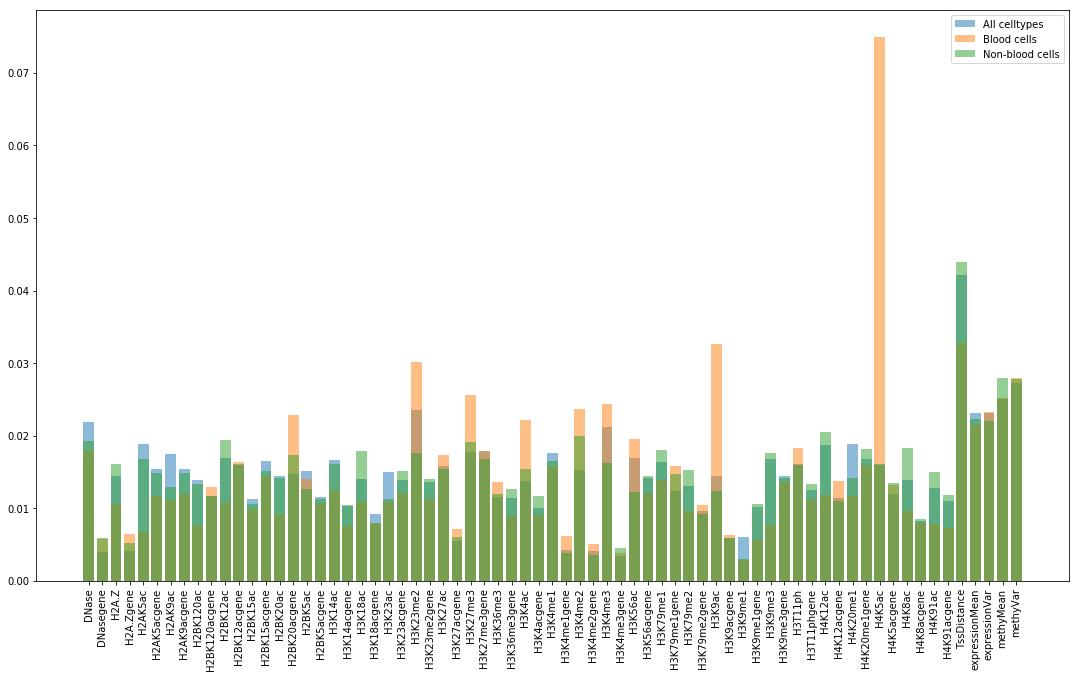

In [31]:
import matplotlib.pyplot as plt
% matplotlib inline
fig = plt.gcf()
fig.set_size_inches(18.5, 10.5)
fig.savefig('Feature importances', dpi=100)
plt.bar(features_all,ranfor_all.feature_importances_,alpha=0.5,label='All celltypes')
plt.bar(features_blood,ranfor_blood.feature_importances_,alpha=0.5,label='Blood cells')
plt.bar(features_nonBlood,ranfor_nonBlood.feature_importances_,alpha=0.5,label='Non-blood cells')
plt.xticks(rotation=90)
plt.legend()
plt.savefig('/home/shuang/projects/development_eqtm/output_fig/feature_importances.png')
plt.show()


In [46]:
np.max(ranfor_blood.feature_importances_)

0.17088036636899778

In [47]:
np.max(ranfor_nonBlood.feature_importances_)

0.17262891336770428

In [48]:
np.max(ranfor_all.feature_importances_)

0.04601050296690815

In [50]:
features_nonBlood

Index(['expressionMean', 'expressionVar', 'TssDistance', 'methyMean',
       'methyVar', 'H4K5acgene', 'H2A.Zgene', 'H2BK120acgene', 'H3K79me2gene',
       'H3K27acgene', 'H2BK20acgene', 'H3K14acgene', 'H3K9acgene',
       'H4K20me1gene', 'H3K4acgene', 'H2AK5acgene', 'H3K9me3gene',
       'H3K36me3gene', 'H3K4me1gene', 'H3K18acgene', 'H3K23acgene',
       'H2BK5acgene', 'H3K4me3gene', 'H2BK12acgene', 'H3K23me2gene',
       'H4K12acgene', 'DNasegene', 'H2BK15acgene', 'H3K9me1gene',
       'H3K4me2gene', 'H3K27me3gene', 'H3K79me1gene', 'H2AK9acgene',
       'H3T11phgene', 'H4K8acgene', 'H4K91acgene', 'H3K56acgene'],
      dtype='object')

In [51]:
features_blood

Index(['expressionMean', 'expressionVar', 'TssDistance', 'methyMean',
       'methyVar', 'H4K5acgene', 'H2A.Zgene', 'H2BK120acgene', 'H3K79me2gene',
       'H3K27acgene', 'H2BK20acgene', 'H3K14acgene', 'H3K9acgene',
       'H4K20me1gene', 'H3K4acgene', 'H2AK5acgene', 'H3K9me3gene',
       'H3K36me3gene', 'H3K4me1gene', 'H3K18acgene', 'H3K23acgene',
       'H2BK5acgene', 'H3K4me3gene', 'H2BK12acgene', 'H3K23me2gene',
       'H4K12acgene', 'DNasegene', 'H2BK15acgene', 'H3K9me1gene',
       'H3K4me2gene', 'H3K27me3gene', 'H3K79me1gene', 'H2AK9acgene',
       'H3T11phgene', 'H4K8acgene', 'H4K91acgene', 'H3K56acgene'],
      dtype='object')

In [52]:
features_all

Index(['expressionMean', 'expressionVar', 'TssDistance', 'methyMean',
       'methyVar', 'H4K5ac', 'H2A.Z', 'H2BK120ac', 'H3K79me2', 'H3K27ac',
       'H2BK20ac', 'H3K14ac', 'H3K9ac', 'H4K20me1', 'H3K4ac', 'H2AK5ac',
       'H3K9me3', 'H3K36me3', 'H3K4me1', 'H3K18ac', 'H3K23ac', 'H2BK5ac',
       'H3K4me3', 'H2BK12ac', 'H3K23me2', 'H4K12ac', 'DNase', 'H2BK15ac',
       'H3K9me1', 'H3K4me2', 'H3K27me3', 'H3K79me1', 'H2AK9ac', 'H3T11ph',
       'H4K8ac', 'H4K91ac', 'H3K56ac', 'H4K5acgene', 'H2A.Zgene',
       'H2BK120acgene', 'H3K79me2gene', 'H3K27acgene', 'H2BK20acgene',
       'H3K14acgene', 'H3K9acgene', 'H4K20me1gene', 'H3K4acgene',
       'H2AK5acgene', 'H3K9me3gene', 'H3K36me3gene', 'H3K4me1gene',
       'H3K18acgene', 'H3K23acgene', 'H2BK5acgene', 'H3K4me3gene',
       'H2BK12acgene', 'H3K23me2gene', 'H4K12acgene', 'DNasegene',
       'H2BK15acgene', 'H3K9me1gene', 'H3K4me2gene', 'H3K27me3gene',
       'H3K79me1gene', 'H2AK9acgene', 'H3T11phgene', 'H4K8acgene',
       'H4K91acgene